# Homework 6: Web Development

__Due: Friday, June 7th, 8:30 AM, late submissions accepted without penalties until Sunday, June 9th, 8:30 AM.__ This may be extended if the situation allows.

In this exercise, you will create a simple webapp using Dash by Plotly and describe how you did it. The skills you will need are:

1. Dash fundamentals, including callbacks.
2. Database skills, including adding items to databases and displaying them.

__You are not required to deploy your app__ to the internet, although you are certainly welcome to do so if you wish.

## Overview
The app you’re going to build is a simple message bank. It should do two things:
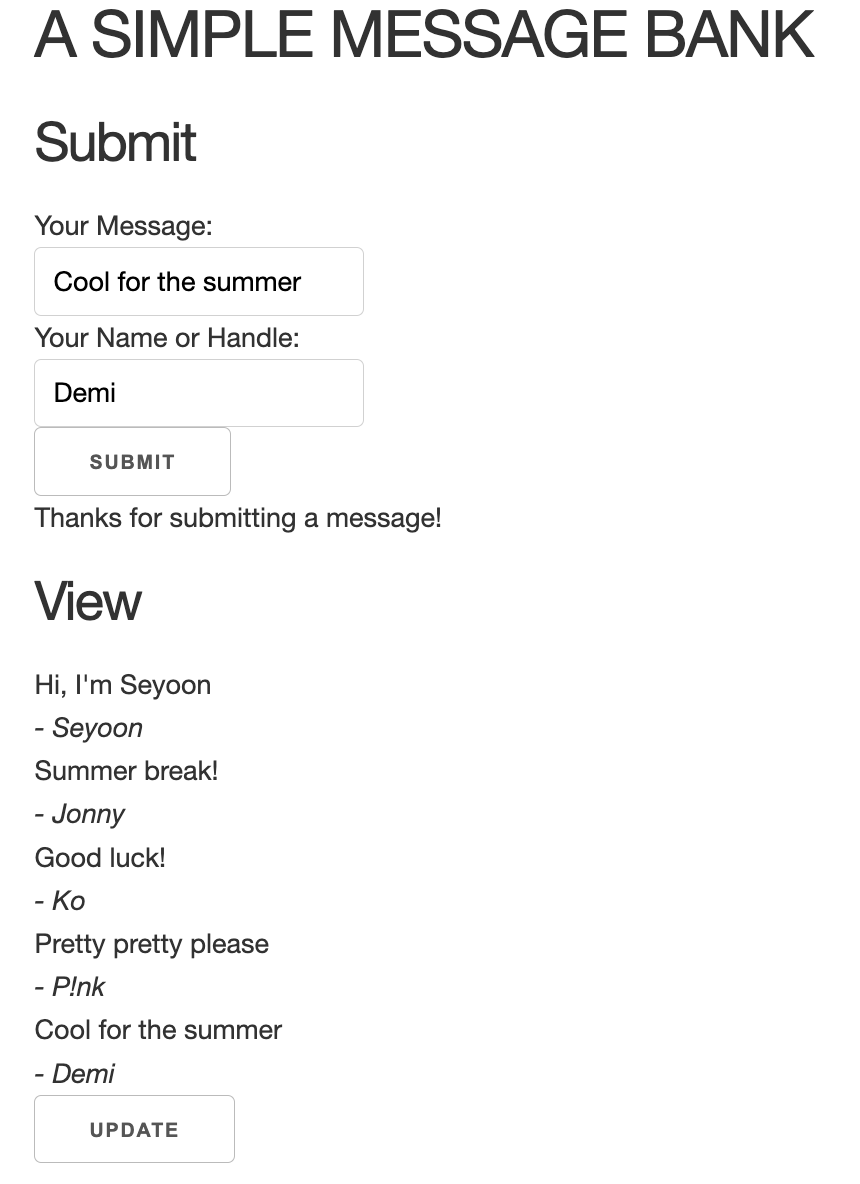
1. Allow the user to __submit__ messages to the bank.
2. Allow the user to __view__ a sample of the messages currently stored in the bank.

Additionally, you should style your app to look attractive and interesting! I encourage you to get creative on this.

Your Jupyter Notebook will contain all the code for the app so that when it is exported as a `.py` file, it can run a webapp with the command `python hw6.py`. It should also contain several screencaps from the functioning of your app, as well as a discussion of the Python functions you implemented to create your app. 

You are free to (and indeed encouraged) build on any of the examples from class, as well as any other resources you are able to find. The lecture materials are good starting points.

__The code for your app must be hosted in a private GitHub repository.__ I suggest you begin by creating such a repository. Commit and push each time you successfully add a new piece of functionality or resolve a bug. __You may be asked to make it public after June 9th, 8:30 am for peer review__.

## Instructions
### 1. Enable Submissions
First, create a `submit` functionality in `app.py` with three user interface elements:

1. A text box for submitting a message.
2. A text box for submitting the name of the user.
3. A "submit" button.


Now, write two Python functions for database management in the file `app.py`.

- `get_message_db()` should handle creating the database of messages.
  1. Check whether there is a database called `message_db` defined in the global scope. If not, then connect to that database and assign it to the global variable `message_db`. To do this last step, write a line like `message_db = sqlite3.connect("messages_db.sqlite")`
  2. Check whether a table called `messages` exists in `message_db`, and create it if not. For this purpose, the SQL command `CREATE TABLE IF NOT EXISTS` is helpful. Give the table a `handle` column (text) and a `message` column (text).
  3. Return the connection `message_db`.
  4. Here is a helpful starter code:
```python
message_db = None
def get_message_db():
    # write some helpful comments here
    global message_db
    if message_db:
        return message_db
    else:
        message_db = sqlite3.connect("messages_db.sqlite", check_same_thread=False)
        cmd = '' # replace this with your SQL query
        cursor = message_db.cursor()
        cursor.execute(cmd)
        return message_db
```

- The function `insert_message(handle, message)` should handle inserting a user message into the database of messages.
  1. Using a cursor, insert the message into the `message` database. Remember that you’ll need to provide the handle and the message itself. You’ll need to write a SQL command to perform the insertion.
    - __Note__: when working directly with SQL commands, it is necessary to run `db.commit()` after inserting a row into `db` in order to ensure that your row insertion has been saved.
    - A column called `rowid` is automatically generated by default. It gives an integer index to each row you add to the database.
    - Close the database connection within the function!
    
- Finally, write a callback function `submit()` to update the components. Maybe it would be nice to add a small note thanking the user for their submission and print an error message if it failed.
  1. Extract the `handle` and the `message` from the components. You’ll need to ensure that your callback deals with the user input by appropriately specifying the property of the input elements. 
  2. You might want to use the keyword argment `prevent_initial_call`. 

### 2. Viewing Random Submissions
Write a function called `random_messages(n)`, which will return a collection of `n` random messages from the `message_db`, or fewer if necessary. This [StackOverflow post](https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table) might help. Don’t forget to close the database connection within the function!

Next, write a new component to display the messages extracted from `random_messages()`. Once again, here is an example:


Finally, write a callback function `view()` to display random messages. This function should first call `random_messages()` to grab some random messages (I chose a cap of 5), and then display these messages using a loop. It should be triggered when the "update" button is pressed.

### 3. Customize Your App

Here’s an example of the app so far:

<img src="HW6.png" alt="app example" width="500">


Let's customize this app by changing styles! At least, you should

- Incorporate a non-default font.
- Use color in some way.

Feel free to add CSS or other stylesheets in order to give your app a personal feel. Extra credits may be given for a more sophiscated and appealing visual. 

Your app should be a lot more colorful than the screencaps shown in this notebook!!

### 4. The Jupyter Notebook
For your notebook, write a tutorial describing how you constructed your webpage. You should include:

- Separate code blocks and explanations for each of the Python functions you used to build your app (there should be at least five of them).
- Display your app running within the notebook.  
- Your report must include two screencaps:
  - In the first screencap, you should show an example of a user submitting a message. In the handle field, __please use either your name or your GitHub handle__.
  - In the second screencap, you should show an example of a user viewing submitted messages. Show at least two messages, one of which is the message you submitted in the previous screencap. __This message should show your name or GitHub handle__.
Additionally, please include in your report a link to the GitHub repository containing the code for your app.

## Specifications

### Format
0. There is no autograder for this homework. 
  - For `code` section, please submit the `zip` file containing all the files in your GitHub repository.  
    - This should at least include `hw6.ipynb`, `hw6.py` (the python file converted from this notebook), and the two screencaps. 
    - If you used any other file (e.g., image or css style file), please also include them.
  - For the `pdf` section, the URL to your GitHub repo for this homework must appear.
  - __You may be asked to send in the URL to your GitHub repo before the final Sunday class and make the repo public during the class. This homework may involve peer review grading.__ 

### Coding Problem
1. Each of the required functions is implemented in a logical way.
2. Each of the required functions appears to successfully achieve the required task.
3. Callback functions also include the appropriate additional functions. For example, the callback function `view()` should call `random_messages()`.
4. Some styling should be done; it should be different from what is shown in the class. You should change font and color to be used. Extra credits for a more sophiscasted and visually appealing approach.

### Style and Documentation
5. Helpful comments are supplied throughout the code. __Docstrings are not required in this homework, and you don't need to show the testing of `get_message_db()`, `insert_message()`, and `random_messages()` outside the web app as well.__

### Writing
6. The overall report is written in engaging and unambiguous English prose. There is written explanations throughout the post, such that a student with the knowledge of the first five weeks of this course could learn to perform the demonstrated tasks by reading the post.
7. Each block of code has a clearly explained purpose.
8. The notebook is organized into clearly delimited sections using markdown headers (#), making it easier for the reader to navigate.
9. The notebook includes the two required screencaps demonstrating the submission and viewing pages of the app.
10. The notebook includes a discussion of all Python functions used to create the app. This should include, at minimum, `get_message_db()`, `insert_message()`, `random_messages()`, `submit()`, and `view()`.
11. The notebook launches the app inside it.
12. The notebook includes a link to the GitHub repository containing the code for the app.


# Answer:

## 1. Packages imported

This code initializes a Dash web application and includes essential libraries for building its interface (dash.html, dash.dcc), handling user interactions (dash.dependencies), and managing data (sqlite3 for databases, pandas for data analysis). These components are crucial for creating interactive, data-driven web applications with Python.

In [76]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import sqlite3
import pandas as pd


## 2. App Initialization

This code initializes a Dash web application, incorporating a stylish and user-friendly interface:

### Initialization: 
Launches the application with dash.Dash() and includes the Roboto font from Google Fonts to enhance text readability and appearance.

### Layout Configuration: 
The layout is defined within a html.Div:

### Title: 
A header styled with centered text and the Roboto font.

### Message Submission: 
Includes text input fields for the user's name and message, styled with specific colors and borders to emphasize interactivity. A submit button is included for clear user actions.

### Message Display: 
Contains a button to refresh message display and a section to show messages, ensuring a consistent visual theme.

The application design uses color and typography to create an engaging user interface that is both functional and visually appealing, making it accessible and easy to use.

In [77]:
# Improved CSS inclusion
external_stylesheets = ['https://fonts.googleapis.com/css2?family=Roboto:wght@400;500&display=swap']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Define the app layout
app.layout = html.Div([
    html.H1("A Simple Message Bank", style={'text-align': 'center', 'font-family': 'Roboto, sans-serif', 'color': '#333'}),
    # Container for message submission elements
    html.Div([
        # Label for the input area
        html.Div("Submit Your Message", style={'font-size': '24px', 'margin-top': '20px', 'color': '#1A5276', 'font-family': 'Roboto, sans-serif'}),
        
        # Text input for user's handle or name
        dcc.Input(id='input-handle', type='text', placeholder='Enter Your Name or Handle:',
                  style={'width': '300px', 'margin': '10px', 'border': '2px solid #1A5276', 'font-family': 'Roboto, sans-serif'}),
        
        # Textarea for entering the message
        dcc.Textarea(id='input-message', placeholder='Enter Your Message:',
                     style={'width': '300px', 'height': '100px', 'margin': '10px', 'border': '2px solid #1A5276', 'font-family': 'Roboto, sans-serif'}),
        
        # Submission button
        html.Button('Submit', id='submit-button', n_clicks=0,
                    style={'margin': '10px', 'background-color': '#1A5276', 'color': 'white', 'border': 'none', 'font-family': 'Roboto, sans-serif'}),
        
        # Response message area for feedback
        html.Div(id='response-message', style={'margin': '10px', 'font-family': 'Roboto, sans-serif', 'color': '#1A5276'})
    ], style={'padding': '20px', 'border': '1px solid #1A5276', 'background-color': '#FFFFE0', 'border-radius': '10px', 'color': '#1A5276'}),

    # Container for viewing messages
    html.Div([
        # Section title for viewing messages
        html.Div("View Messages", style={'font-size': '24px', 'margin-top': '20px', 'color': '#239B56', 'font-family': 'Roboto, sans-serif'}),
        
        # Button to update the displayed messages
        html.Button('Update View', id='update-button', n_clicks=0,
                    style={'margin': '10px', 'background-color': '#239B56', 'color': 'white', 'border': 'none', 'font-family': 'Roboto, sans-serif'}),
        
        # Area where messages are displayed
        html.Div(id='display-messages', style={'margin': '10px', 'font-family': 'Roboto, sans-serif', 'color': '#239B56'})
    ], style={'padding': '20px', 'border': '1px solid #239B56', 'background-color': '#FFFFE0', 'border-radius': '10px', 'color': '#239B56'})
], style={'width': '500px', 'margin': 'auto', 'font-family': 'Roboto, sans-serif'})

## 3. Functionality

### Database Connection Setup: `get_message_db()`

This function establishes a connection to a SQLite database, ensuring the database and required table exist. It uses a singleton pattern to maintain a single connection.

In [78]:
# Function to get or create a database connection
def get_message_db():
    """Establish or retrieve a database connection, creating the table if it does not exist."""
    db = sqlite3.connect('messages_db.sqlite', check_same_thread=False)
    cursor = db.cursor()
    cursor.execute('''CREATE TABLE IF NOT EXISTS messages
                      (handle TEXT, message TEXT)''')
    db.commit()
    return db

### Handling Message Submissions: `insert_message(handle, message)`

Inserts a new message into the database. It handles database operations securely and closes the connection after operation.

In [79]:
# Function to insert a new message into the database
def insert_message(handle, message):
    """Insert a new message into the database with the user's handle and message text."""
    db = get_message_db()
    cursor = db.cursor()
    try:
        cursor.execute('INSERT INTO messages (handle, message) VALUES (?, ?)', (handle, message))
        db.commit()
    except sqlite3.Error as e:
        print(f"An error occurred: {e}")
    finally:
        db.close()


### Fetching and Displaying Messages: `random_messages(n=5)`

Fetches a random selection of messages from the database to be displayed on the application interface.

In [80]:
# Function to fetch random messages from the database
def random_messages(n=5):
    """Retrieve a random sample of messages from the database."""
    db = get_message_db()
    try:
        sql_query = "SELECT handle, message FROM messages ORDER BY RANDOM() LIMIT ?"
        df = pd.read_sql_query(sql_query, db, params=(n,))
    except sqlite3.Error as e:
        print(f"An error occurred: {e}")
        df = pd.DataFrame()  # Return an empty DataFrame on error
    finally:
        db.close()
    return df


### Interactivity with Callbacks: Submission and Viewing Callbacks

These functions connect the UI elements with the backend operations, allowing dynamic interaction within the application.

In [81]:
# Callback for handling message submissions
@app.callback(
    Output('response-message', 'children'),
    Input('submit-button', 'n_clicks'),
    [State('input-handle', 'value'), State('input-message', 'value')],
    prevent_initial_call=True
)
def submit(n_clicks, handle, message):
    """Provide feedback on message submission and process the insertion into the database."""
    if handle and message:
        insert_message(handle, message)
        return 'Thank you! Your message has been submitted.'
    return 'Please fill in both your name and a message.'

In [82]:
# Callback for updating the displayed messages
@app.callback(
    Output('display-messages', 'children'),
    Input('update-button', 'n_clicks'),
    prevent_initial_call=True
)
def view(n_clicks):
    """Update the web page to show a selection of random messages from the database."""
    df = random_messages(5)  # Retrieve up to 5 random messages
    if df.empty:
        return "No messages to display."
    # Create a list item for each message and return them wrapped in an unordered list.
    messages = [html.Li(f"{row['handle']}: {row['message']}") for index, row in df.iterrows()]
    return html.Ul(messages)

## 4. Start the application

In [83]:
# Start the Dash application on the specified port.
if __name__ == '__main__':
    app.run_server(debug=True, port=8058)

## Screencap: Submission

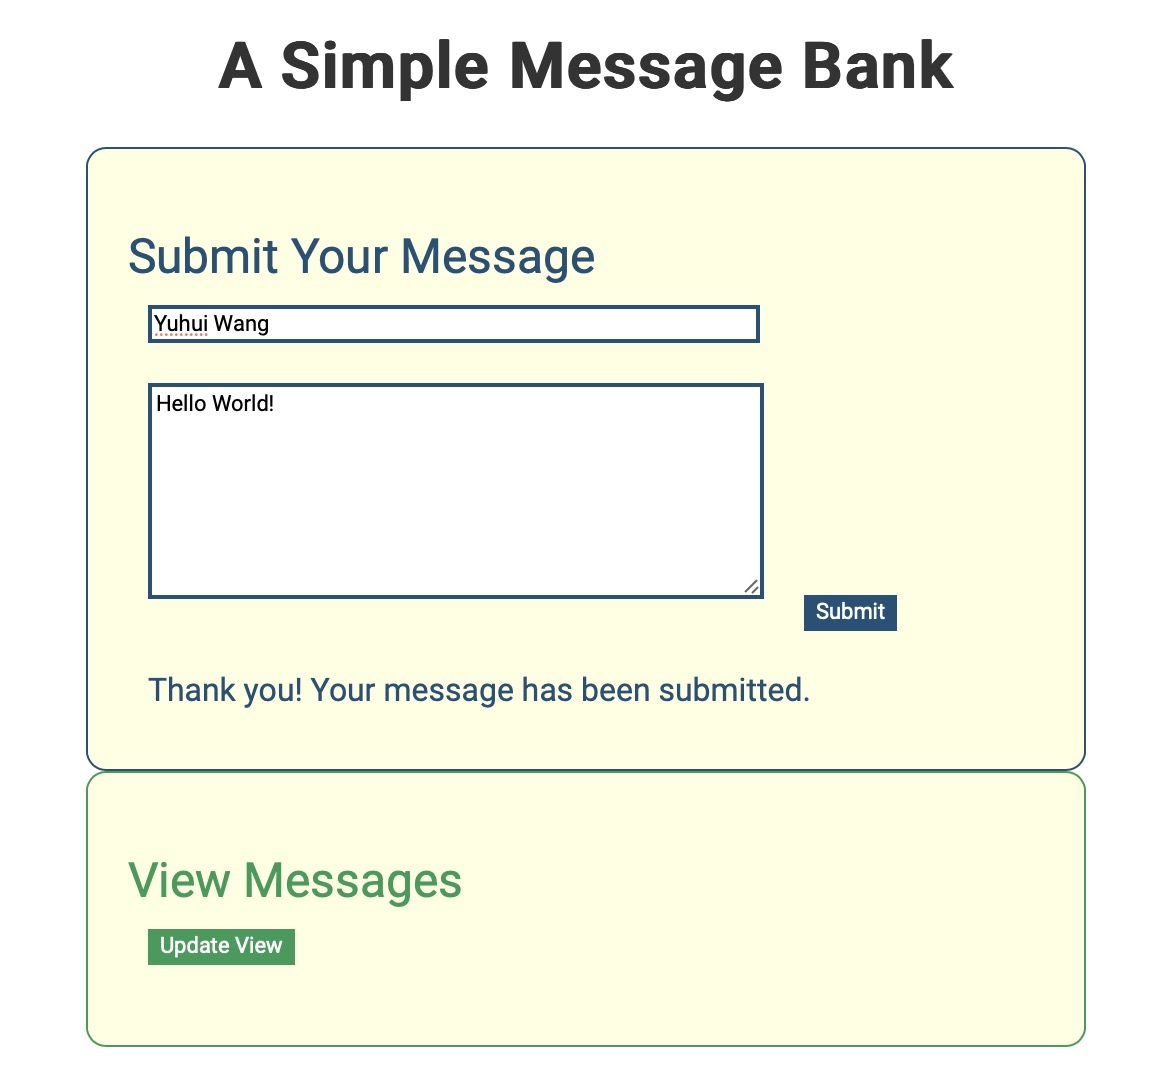

## Screencap: Viewing

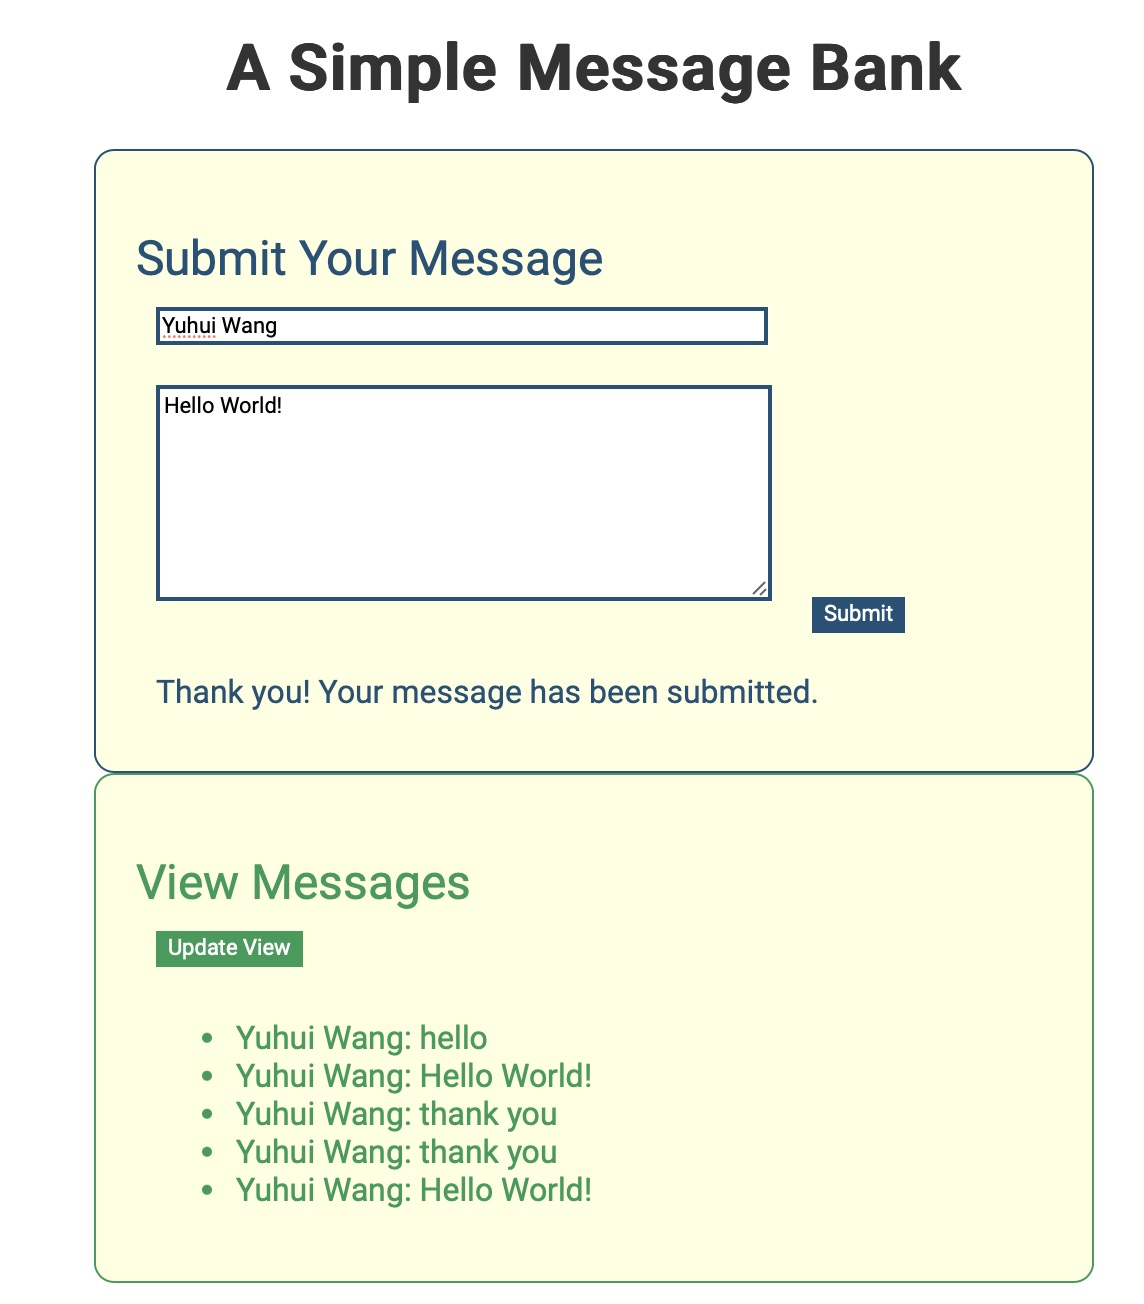

## 5. Discussion

1. `get_message_db()`:
Purpose: Manages a singleton database connection and ensures the required table exists, optimizing resource usage and maintaining consistent database access.

2. `insert_message()`:
Purpose: Inserts user-submitted messages into the database. It handles database connections, executes insertion commands, and manages error scenarios, ensuring data integrity and security.

3. `random_messages()`:
Purpose: Retrieves a random sample of messages from the database, enabling dynamic content display on the user interface for enhanced user engagement.

4. `submit()`:
Purpose: A callback function that processes message submissions from the user interface, stores them in the database, and provides feedback to users, facilitating interactive user experience.

5. `view()`:
Purpose: Another callback function that updates the message display area with random messages from the database when triggered, keeping the application content fresh and engaging.

These functions collectively ensure the application is interactive, data-driven, and user-friendly, each fulfilling specific roles that contribute to the overall functionality and user experience of the app.